# "Communicate Data Findings" Project: Telling a Pokemon Story!
##                                        by (Argyrios Liatsis)
## Table of Contents

<ul>
    <li><a href = "#intro">1) Introduction </a></li>
    <li><a href = "#wra"> 2) Preliminary Wrangling </a></li>
    <li><a href = "#uni"> 3) Univariate Analysis </a></li>
    <li><a href = "#bi"> 4) Bivariate Analysis </a></li>
    <li><a href = "#multi"> 5) Multivariate Analysis </a></li>
    <li><a href = "edar"> 6) Exploratory Data Analysis Results </a></li>
    <li><a href = "#con"> 7) Conclusion </a></li>
    <li><a href = "#app"> 8) Appendix </a></li>
</ul>


<a id='intro'></a>
## 1) Introduction

The motivation behind the choice of this specific dataset is the fact that the writer grew up with Pokemon as a kid, and was further inspired by Mr. Mike Yi's spectacular Visualisation course with a very similar dataset used as an example. After scouring the web for similar datasets, this particular Pokemon dataset, provided by Kaggle user Alberto Barradas, was selected. The link containing the original dataframe is included in the "Appendix" section.


<a id='wra'></a>
## 2) Preliminary Wrangling


This dataset includes 800 Pokemon, in other words, 800 data observations, as well as eleven(11) features, at least one of which is categorical, and last, but not least, this is a tidy dataset (each variable is a column, each observation is a row). All the aforementioned characteristics of this dataset  are in adherence to the minimum requirements for a custom dataset required for this project. 

### 2.1) Dataset Structure

The dataset of interest includes eleven(11) features, namely "Name", "Type 1", "Type 2", "Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation, and "Legendary". Approximately half of the values of "Type 2" feature are null, which is intended. 

These are the raw attributes that are used for calculating how much damage a Pokemon move will do . This dataset contains data about the pokemon present in handheld console games, excluding pokemon card games and Pokemon Go. Below is a quick synopsis of the dataset's features:

#: ID for each pokemon
 - Name: Name of each pokemon
 - Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
 - Type 2: Some pokemon are characterized by two types
 - Total: The total sum of pokemon stats; an overview of how strong a Pokemon is
 - HP: Health Points, or Health, defines how much damage a pokemon can withstand before fainting
 - Attack: the base modifier for normal attacks (eg. Scratch, Punch, Tackle, etc.)
 - Defense: the base damage resistance against normal attacks
 - SP Atk: special attack, the base modifier for attacks that generally don't require bodily contact (e.g. Flamethrower, Solarbeam, etc.)
 - SP Def: the base damage resistance against special attacks
 - Speed: determines which pokemon attacks first each round


### 2.2) Features of Interest

   

Most of the feature names are self-explanatory, however providing a brief explanation is the best practice, especially for someone who is not familiar with Pokemon. To elaborate, every Pokemon has a type, with many of them having two types. The "type" determines how strong they are against pokemon of other types. For instance, a "fire" pokemon has the advantage against a pokemon of "grass" type, whereas it is weak against a pokemon of the "water" type; akin to a rock-paper-scissors case. "HP" stands for "Health Points" which indicates how healthy a pokemon; the more, the merrier. "Sp. Atk", also known as "Special Attack" is an attribute that is used when a Pokemon attacks with a move that doesn't have include direct body contact (as opposed to "Attack"), like fire attacks, psychic attacks, etc. and "Sp. Def", or "Special Defense", is used for for defending against that.

Since this dataset does not contain a vast amount of features, almost all of them are considered to be of interest.


### 2.3) Focused Features


The focused features that most of the exploratory analysis takes place on are "Speed", "Attack, "Sp. Atk", "Total", "Legendary", "Generation", and last, but not least, the engineered feature "agility_level". The "Speed" characteristic is important, since Pokemon games are for their vast majority turn-based, thus the pokemon with the highest speed stat always goes first. Next, "Attack" and "Sp. Atack"(special attack) are the offensive attributes of a Pokemon; they determine the damage they deal, while "total" summarises their attributes to showcase how strong a Pokemon is. "Legendary" defines the one-of-a-kind Pokemon, those that are the sole representative of their species. "Type_1" is the type of a Pokemon (Fire, Water,etc.), and "agility_level" is a categorical feature that was engineered solely for the purpose of this project. It has seven(7) values, "Extremely Slow", "Slow", "Below Average", "Above Average", "Fast", "Very Fast" and "Extremely Fast".


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(style="whitegrid")

%matplotlib inline

### 2.4) Gathering

The gathering process was extremely easy and simple, since Kaggle offers a plethora of datasets for educational purposes.

In [4]:
#Loading the dataset
df = pd.read_csv('Pokemon(Kaggle).csv')

### 2.5) Assessing



In [82]:
#checking overall column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [83]:
#Visual assessment
df.sample(4)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
449,404,Luxio,Electric,NaN,363,60,85,49,60,49,60,4,False
480,432,Purugly,Normal,NaN,452,71,82,64,64,59,112,4,False
493,445,Garchomp,Dragon,Ground,600,108,130,95,80,85,102,4,False


In [7]:
#Checking for duplicated values
df.duplicated().sum().any()

False

In [8]:
#Checking for null values
df.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [84]:
#Checking for duplicated values
df.duplicated().sum().any()

False

In [85]:
#Checking for any abnormal/extreme quantitative variables
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


#### 2.5.1) Assessment Results

By assessing the dataset both visually and programmatically, it was concluded that the data is complete (type_2 column excluded), valid and accurate, as well as in a tidy format. "Type_2" column's status is intended, since not every Pokemon has a second type.   
However, a consistency issue was observed, namely the naming convention of the columns of the dataset. To elaborate on that, the column names are often abbreviated as to avoid elongate names, which is fine when presenting the dataset to the public, but for exploratory analysis it can be slightly beneficial to convert them to lower case.   
Also, in the case of "Sp. Atk" and "Sp. Def", one who's not familiar with the subject will most likely need to make assumptions on what these features may be. This (minor) issue is fixed below by renaming the columns to a more readable format.

### 2.6) Cleaning

In [11]:
#Making a copy of the dataset before proceeding with cleaning it
df_copy = df.copy()

In [12]:
#Renaming columns to assist with exploratory analysis later
df_copy.rename(columns = {'Name': 'name', 'Type 1': 'type_1', 'Type 2': 'type_2', 'Total':'total', 'HP': 'health_points',
                    'Attack':'attack', 'Defense':'defense', 'Sp. Atk':'special_attack', 'Sp. Def':'special_defense',
                    'Speed':'speed', 'Generation':'generation', 'Legendary':'legendary'}, inplace = True) 

In [13]:
#Testing the column name changes above
df_copy.dtypes

#                   int64
name               object
type_1             object
type_2             object
total               int64
health_points       int64
attack              int64
defense             int64
special_attack      int64
special_defense     int64
speed               int64
generation          int64
legendary            bool
dtype: object

In [14]:
df_copy.sample(5)

,#,name,type_1,type_2,total,health_points,attack,defense,special_attack,special_defense,speed,generation,legendary
476,428,LopunnyMega Lopunny,Normal,Fighting,580,65,136,94,54,96,135,4,False
669,608,Lampent,Ghost,Fire,370,60,40,60,95,60,55,5,False
772,702,Dedenne,Electric,Fairy,431,67,58,57,81,67,101,6,False
381,349,Feebas,Water,NaN,200,20,15,20,10,55,80,3,False
247,229,Houndoom,Dark,Fire,500,75,90,50,110,80,95,2,False


In [15]:
df_copy.describe()

,#,total,health_points,attack,defense,special_attack,special_defense,speed,generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [16]:
#Setting percentiles for our data to slice it into more accurate bins 
df_copy['speed'].describe(percentiles = [.05, .25, .5, .75, .90, .95])

count    800.000000
mean      68.277500
std       29.060474
min        5.000000
5%        25.000000
25%       45.000000
50%       65.000000
75%       90.000000
90%      106.000000
95%      115.000000
max      180.000000
Name: speed, dtype: float64

In [17]:

#Making bins to categorize pokemon speed, then assigning a new categorical feature, along with its values (bin names)
bin_edges = [5,25,45,65,90,106,150,180]
bin_names = ['Extremely Slow','Slow','Below Average','Above Average','Fast','Very Fast','Extremely Fast']
df_copy['agility_level'] = pd.cut(df_copy['speed'], bin_edges, labels=bin_names)

In [18]:
#Testing the new categorical feature
df_copy.query('agility_level == "Extremely Fast"')

,#,name,type_1,type_2,total,health_points,attack,defense,special_attack,special_defense,speed,generation,legendary,agility_level
315,291,Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,False,Extremely Fast
431,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True,Extremely Fast


In [20]:

#Changing generation to a qualitative feature
df_copy['generation']= df_copy['generation'].apply(str)

In [21]:

#Replacing the corresponding generation numbers with alphabetical names
df_copy['generation'].replace({'1':'first','2':'second','3':'third','4':'fourth','5':'fifth','6':'sixth'}, inplace=True)

In [22]:
df_copy['generation'].sample(10)

324     third
314     third
657     fifth
695     fifth
161     first
593     fifth
550    fourth
429     third
184    second
584     fifth
Name: generation, dtype: object

In [23]:
df_copy.to_csv('Pokemon_clean.csv')

#### 2.6.1) Cleaning explained

Regarding the structure of the dataset, a few adjustments were made to accomodate for questions asked by an interested party. To elaborate on that, one new categorical feature was engineered ("agility_level") and another feature("generation") had its type changed (from int64 to object/string), while still maintaining its status as a qualitative feature.

The cause behind the aforementioned changes was to enable analysis for Pokemon speciments based on their "speed" characteristic, in the case of "agility" level, while the change on the "generation" feature was more of a supplementary one to assist in EDA accross all cases/questions.

<a id='uni'></a>
## 3) Univariate Exploration

In this section, the investigation of the data using single variables takes place. Specifically, the features "type", "speed" and "special_attack" are used to gain visual feedback about them.

### 3.1) What are the most common Pokemon types?

The simplest univariate exploration attempt that comes to mind is finding out the most common Pokemon types that inhabit the digital world of Pokemon.

In [24]:
#Finding the most common pokemon types
df_copy['type_1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Dragon       32
Ghost        32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: type_1, dtype: int64

In [25]:
#Most common pokemon types in percentage
df_copy['type_1'].value_counts(normalize=True)*100

Water       14.000
Normal      12.250
Grass        8.750
Bug          8.625
Psychic      7.125
Fire         6.500
Electric     5.500
Rock         5.500
Ground       4.000
Dragon       4.000
Ghost        4.000
Dark         3.875
Poison       3.500
Fighting     3.375
Steel        3.375
Ice          3.000
Fairy        2.125
Flying       0.500
Name: type_1, dtype: float64

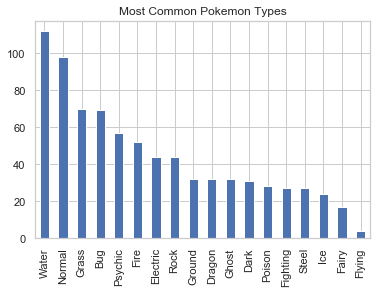

In [26]:
#Visualisation of most common pokemon types
df_copy['type_1'].value_counts().plot(kind='bar', title= 'Most Common Pokemon Types');

Simple investigations may still turn up very intuitive results. It is apparent from the visualization aboe that the most common Pokemon type is "Water", followed by "Normal" and "Grass" types.

### 3.2) How much speed do most Pokemon have?

In order to answer this question accurately, a certain data preparation step has to be carried out to ensure accurate visualisation. To elaborate, appropriate bins have to be defined to visualise this piece of data. In order to set bins efficiently so as to present data accurately, Sturge's Rule was used in order to accurately set the bins for histogram visualisation.

**Designating bin sizes by applying Sturge’s Rule**  
- **K = 1 + 3. 322 logN**


K = 1 + 3,322 log 800(number of observations)  
K = 1 + 3,322 x 2,903(rounded to 4 digits)  
K = 1 + 9,644 
K = 7.644 = 10,644 (rounded to 11)

According to Sturge's Rule, the number of bins that should be used for this dataset is eleven(11).

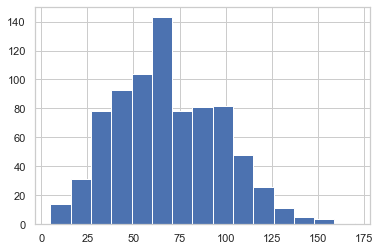

In [61]:
#Showcasing the distribution of average pokemon speed
ax1 = bin_edges = np.arange(5, df_copy['speed'].max()+1, 11)
ax1 = plt.hist(data = df_copy, x = 'speed', bins = bin_edges);

In [60]:
df_copy.describe()

,#,total,health_points,attack,defense,special_attack,special_defense,speed
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


The resulting visualisation shows that the vast majority of Pokemon in our data has a speed stat between fifty(50) and seventy(70).

### 3.3) How much Special Attack do most Pokemon have?

Special attack is one of the more important stats a Pokemon can have. The same number of bins is used to visualize this data, according to Sturge's Rule.

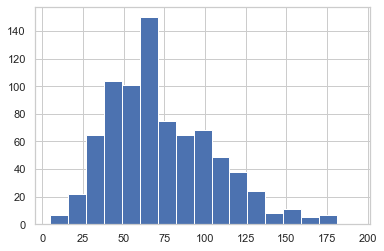

In [62]:
#Showcasing the distribution of average pokemon special attack
ax2 = bin_edges = np.arange(5, df_copy['special_attack'].max()+1, 11)
ax2 = plt.hist(data = df_copy, x = 'special_attack', bins = bin_edges);

As it can be derived from this right-skewed distribution, the majority of the Pokemon of our data has a "special_attack" stat value of approximately between 37 and 72. 

### 3.4) Univariate notes and observations

> When it comes to unusual distributions, it was surprising to discover that so few Flying type Pokemon actually exist. The rest of the distributions yielded expected results, as they coincide with the mean values discovered by utilising the .describe() pandas function. The only change in that dataset that had to be done was regarding the histogram visualisation bins. Picking the wrong count of bins has an extremely huge impact on the insight(s) that can be derived from a visualisation, and this case is no exception.


<a id='bi'></a>
## 4) Bivariate Exploration

> In this section, the investigation between pairs of variables in the dataset takes place. Specifically, the features regarding "Generation", "Total", "Legendary", "Speed", "Type_1" are pitted against each other to draw insights.

### 4.1) Which Pokemon generation introduced the least weak Pokemon?



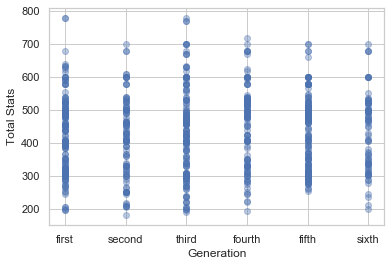

In [74]:
#Distribution of pokemon's overal stats across generations
b = plt.scatter(data = df_copy, x = 'generation', y = 'total', alpha = 3/8);
b = plt.xlabel("Generation")
b = plt.ylabel("Total Stats")

Interestingly enough, the generation that introduced the least weak Pokemon appears to be the fifth one. Which leads to...

### 4.2) Which Pokemon generation introduced the fastest Pokemon?
Since "speed" is one of the most focused features of this project, it is justifiable that another question would be asked regarding it.

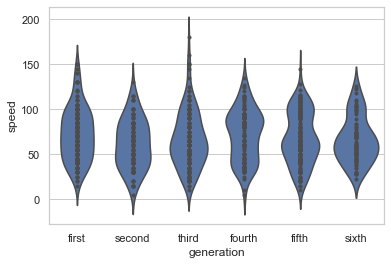

In [72]:
#Showcasing the fastest Pokemon per generation via violin plotting
violin_color = sb.color_palette()[0]
sb.violinplot(data = df_copy, x = 'generation', y = 'speed', color = violin_color,
              inner = "point",);


It appears that the **third** generation is the one that introduced the fastest Pokemon, and that Pokemon is none other than...

In [77]:
df_copy.query('speed == 180')

,#,name,type_1,type_2,total,health_points,attack,defense,special_attack,special_defense,speed,generation,legendary,agility_level
431,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,third,True,Extremely Fast


... Deoxys Speed Forme, a special legendary among legendary Pokemon!

### 4.3) Are Legendary Pokemon much stronger than common Pokemon?
It's a common consensus that legendary Pokemon are stronger than their non-legendary counterparts, but by how much?

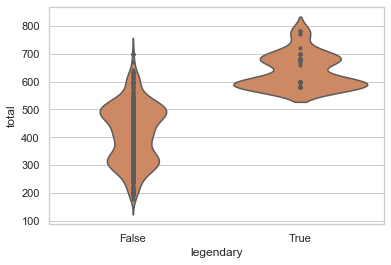

In [66]:
#Plotting in a violin plot the "legendary" and "total" features
violin_color = sb.color_palette()[1]
sb.violinplot(data = df_copy, x = 'legendary', y = 'total', color = violin_color,
              inner = 'point',);

Now THAT is an extreme difference in power! The legendary Pokemon in the lower end of the distribution spectrum, or should I say, the weakest ones, are a fair match for the strongest non-legendary Pokemon in existense! 

### 4.4) Which Pokemon generation(s) have the weakest Special Attackers?
It would be prudent to know which generations of Pokemon to avoid when trying to catch and train Special Attacker Pokemon.

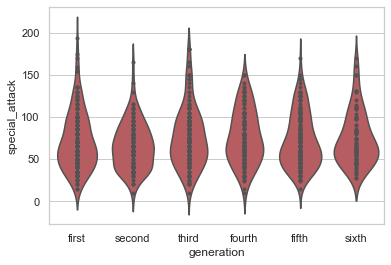

In [70]:
#Visualizing the special attackers via seaborn's violinplot function
violin_color = sb.color_palette()[3]
ax = sb.violinplot(data = df_copy, x = 'generation', y = 'special_attack', color = violin_color,
                   pallete = 'muted' , inner = 'point');

It is fairly obvious that Special Attacker Pokemon enthusiasts should avoid Pokemon from the second and fourth generation as a rule of thumb, based on the graph above.

### 4.5) What are the strongest Pokemon types?
That's a question that was asked to me numerous times across the years, and thanks to this data, it can be given a (straight) answer.

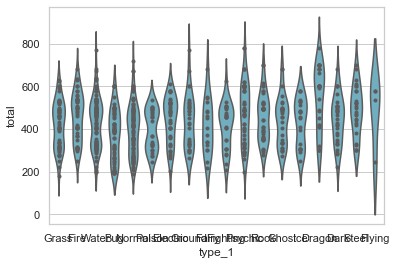

In [81]:
violin_color = sb.color_palette()[9]
sb.violinplot(data = df_copy, x = 'type_1', y = 'total', color = violin_color,
              inner = 'point', height = 20);



It can be derived from the visualisation above that the strongest Pokemon type when it comes to "total stats" is no other than the "Dragon" type.

### 4.6) Bivariate notes and observations

One eye-catching observation is the fact that the Dragon type is the type with the population with the most total stats among all types, although it may be justified, judging by how rare the type is (see 3.1). Certainly not all Pokemon types are born equal! But the most fascinating observation comes from 4.3); legendary Pokemon are not to be trifled with! Another really interesting observation has to do with the fastest Pokemon to exist. While it is indeed the fastest Pokemon, it is very fragile, with only fifty(50)! base Health Points!

<a id='multi'></a>
## 5) Multivariate Exploration

> In this section, the investigation between three variables for each question  takes place. Specifically, the features regarding "Generation", "Legendary", "Attack", "Special Attack" and "Speed" are used for this purpose.

### 5.1) Which generation(s) introduced the strongest legendary Pokemon?

The multivariate exploration is kickstarted with a scatterplot that tries to tackle the aforementioned question. Once again,  
a "legendary" Pokemon is considered a Pokemon that is unique as a species.

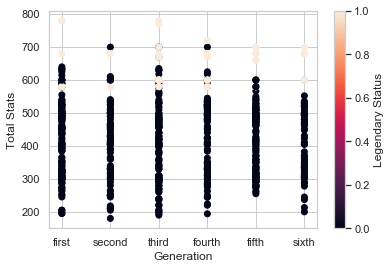

In [44]:
#Using matplotlib to showcase the strongest legendary Pokemon
plt.scatter(data = df_copy, x = 'generation', y = 'total', c = 'legendary')
plt.xlabel("Generation")
plt.ylabel("Total Stats")
plt.clim(0,1)
plt.colorbar(label ="Legendary Status");

As it is apparent from this graph, the strongest legendary Pokemon were introduced in the **first** and **third** generations. Next, the multivariate exploration continues with a comparison between Attacker and Special Attacker Pokemon, with factoring in whether a pokemon is legendary or not.

### 5.2) How do Special Attacker Pokemon compare to Attacker Pokemon?

Following up the investigation of legendary Pokemon, further investigation led to the question imposed above, but more importantly, this was a question that was imposed by a third party interested in this project.

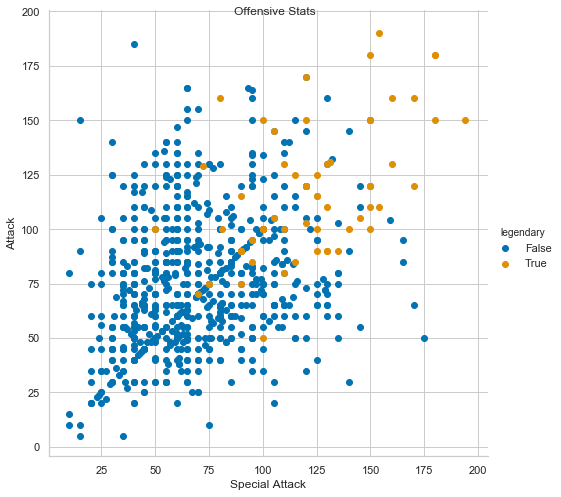

In [57]:
#Using seaborn's FacetGrid to showcase 
fg1 = sb.FacetGrid(data = df_copy, hue = 'legendary', height = 7,
                 palette = 'colorblind')
fg1.map(plt.scatter, 'special_attack', 'attack',)
fg1.set_axis_labels("Special Attack","Attack")
fg1.add_legend();
fg1.fig.suptitle('Offensive Stats');

It is not crystal-clear which specialized (Special Atk. or Attacker) category of Pokemon is the winner here, however
it is obvious that ten(10) Attacker Pokemon have over 150 Attack, while only eight(8) Special Attacker Pokemon
have over 150 Special Attack, legendary Pokemon included.
Following up the investigation of Special Attacker Pokemon, further investigation led to the question imposed below.

### 5.3) How many Attacker Sweepers exist?

"Sweepers" in pokemon communities are Pokemon that specialise in taking out other Pokemon quickly and efficiently; they usually
excel at either Attack and Speed, or Special Attack and Speed to maximise their effectiveness in that role.

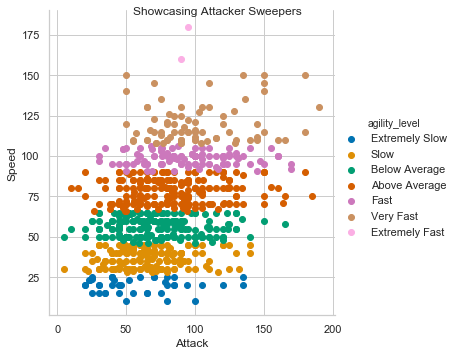

In [56]:
fg2 = sb.FacetGrid(data = df_copy, hue = 'agility_level', height = 5,
                 palette = 'colorblind')
fg2.map(plt.scatter, 'attack', 'speed',)
fg2.set_axis_labels("Attack","Speed")
fg2.add_legend();
fg2.fig.suptitle('Showcasing Attacker Sweepers');

By assessing the graph above, it is derived that there exist five(5) pokemon with "Very Fast" speed and way above average attack (over 150).

<a id='edar'></a>
## 6) Exploratory Data Analysis Results

### General observations and insights

> The end results of EDA turned out to be fruitful; there is a lot of useful information that can be derived from them. To begin with, a general observation that can be derived it is the fact that most Pokemons' total stats distribution are closer to their minimum values than they are to their maximum. In layman's terms, most Pokemon can be considered to be "weak", while fewer of them cane be considered to be "strong". Furthermore, a general consensus can be made that legendary Pokemon are stronger in every aspect than their non-legendary counterparts. Last, but not least, specific insights were drawn in the multivariate section of this reporting regarding offensive pokemon stats. To elaborate, only five(5) pokemon with "Very Fast" speed were the 150 Attack mark, while it was proven the top Attacker Pokemon are more numerous compared to the top Special Attacker Pokemon.

### Surprising factors and interactions

> The exploration of this dataset turned out some very interesting results. To begin with, it was not expected that the strongest legendary Pokemon were introduced in the first and third generations (check 5.1). One could think that since pokemon gradually increased in popularity, the power of legendary Pokemon would increase, but that was not the case, according to the data. Another surprising insight that occured during the investigation was the fact that as the generations advanced, lesser and lesser weak Pokemon were introduced, with this trend peaking at the fifth generation, as it's shown in 4.1) Last, but definitely not least, a surprising observation was displayed in 4.3), namely the difference in power between legendary and non-legendary Pokemon. Without a doubt, legendary Pokemon are a forced to be feared!


<a id='con'></a>
## 7) Conclusion

To conclude, I have to confess that this project was an extremely educative experience. One of the most intuitive moments while working on this project was when I was communicating with third parties interested in Pokemon games to ask their  advice about what kind of questions they would like to have answered by this project. This helped me think out of the box and broaden my horizons about what I could accomplish with the data that was in my hands, and what I could not.

In future iterations, this dataset may be expanded by utilizing web scraping techniques in order to enrich the data availability, thus further improving the insights that can be drawn from this project.

<a id='app'></a>
## 8) Appendix

Any supportive material that was used for the purpose of this project and data is referenced here. Moreover, unused code related or unrelated to the project may also be found below.



- Dataset Source https://www.kaggle.com/abcsds/pokemon
- "How to Choose bin Sizes" https://www.statisticshowto.com/choose-bin-sizes-statistics/
- Bulbapedia, for confirming certain data :https://bulbapedia.bulbagarden.net/wiki/Main_Page
- Library documentation where applicable



In [47]:
#df['dual_type'] = np.where(df['type_1']=='Z', 'green', 'red')
#df['dual_type'] = ['0' if x == 'Z' else 'green' for x in df['type_1']]
#df['dual_type'] = df[['type_1, type_2']].apply(lambda x: x[''])
#df[['type_1','type_2']].apply(lambda x: x['c'] if x['c']>0 else x['b'], axis=1)
#df['type'] = df['type_1'].fillna(df['type_2'])
#df['type'] = (df['type_1'].fillna('') + '/' + df['type_2'].fillna('')).str.strip('/')
#df.drop(['type'], axis =1, inplace=True)